# Part II - The influence of trip data characteristics on their duration
## by Nguyen Huu Tuan

## Investigation Overview


The purpose of this study was to analyze the trip data characteristics that have predictive value for trip duration. The primary emphasis was placed on investigating five key variables: age, start station, end station, user type, and gender. The objective was to examine how these factors contribute to predicting the duration of trips.


## Dataset Overview

The dataset for fordgobike contains a total of 183,411 rowa and 16 columns ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). In the dataset, have 7 columns float, 2 columms int and 7 columns object. Column 'start_time' and 'and_time' are time, convert from object to datetime.

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframe
# i use file when finished part 1
df = pd.read_csv('fordgobike_tripdata_part2.csv')
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday,date,age_group,start_time_hour
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,4902,Customer,1984.0,Male,No,35.0,Thu,2019/02/28,20-39,17
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,...,2535,Customer,NaN,NaN,No,NaN,Thu,2019/02/28,60+,18
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,5905,Customer,1972.0,Male,No,47.0,Thu,2019/02/28,40-59,12
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,6638,Subscriber,1989.0,Other,No,30.0,Thu,2019/02/28,20-39,17
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,4898,Subscriber,1974.0,Male,Yes,45.0,Thu,2019/02/28,40-59,23


## Distribution of Gender

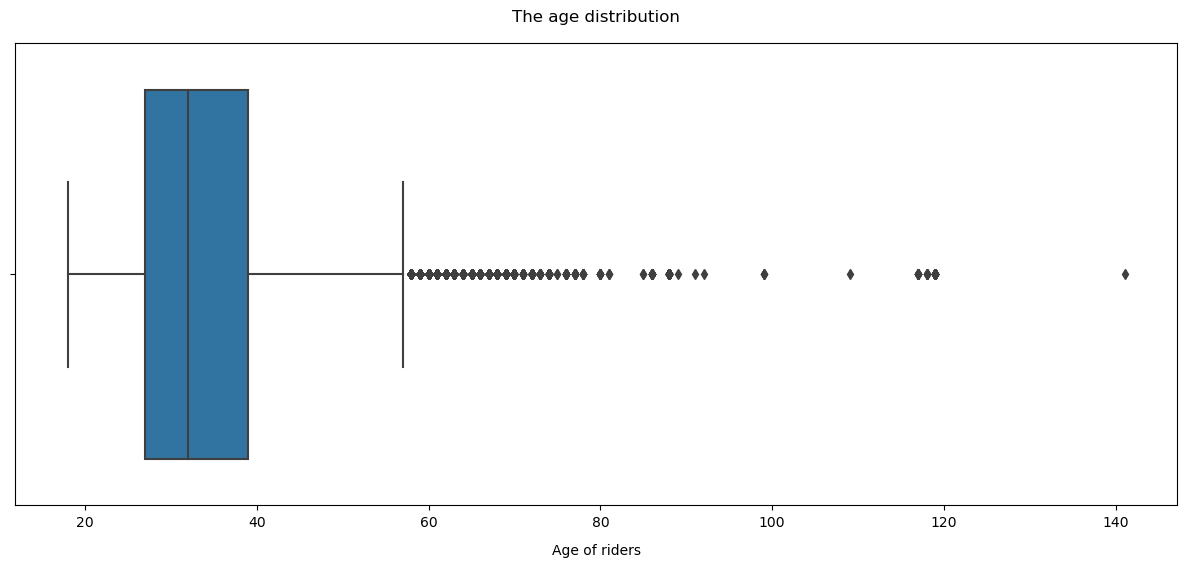

In [20]:
plt.figure(figsize=(15,6))
sb.boxplot(x='age', data=df, orient='h')
plt.title("The age distribution", y=1.03)
plt.xlabel("Age of riders", labelpad=10)
plt.show()

## Count of daily bike rides

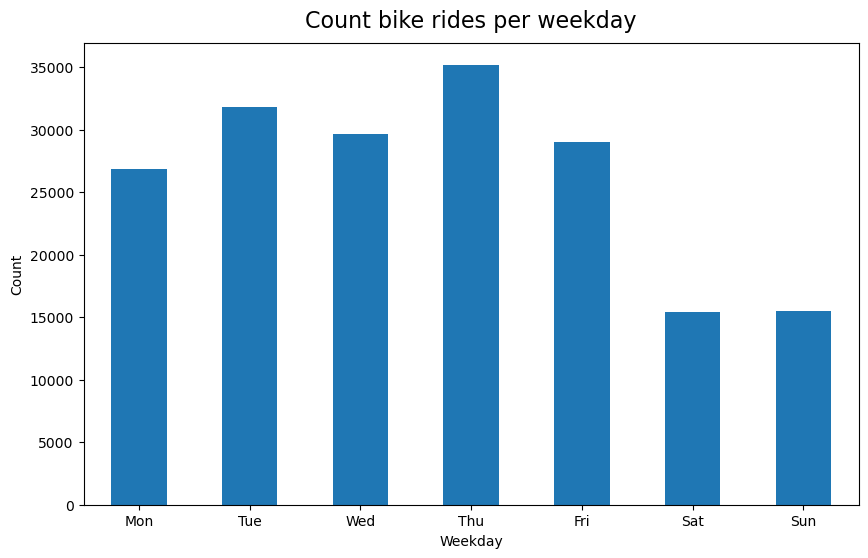

In [21]:
df_weekday_trips = df.groupby('weekday').agg({'bike_id':'count'})
days_ordered = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_weekday_trips = df_weekday_trips.reindex(days_ordered)
df_weekday_trips.plot(kind='bar', figsize=(10,6), legend=False)
plt.title('Count bike rides per weekday', fontsize=16, y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

## Using Times of Biker

In [22]:
def subscriber_hour_age_group_user_type(age_group, user_type):
    subscriber_hour_dataFrame = df[(df['start_time_hour'] > 5) & (df['user_type'] == user_type)
                                  ].groupby(['weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

    subscriber_hour = df[(df['age_group']== age_group) & (df['start_time_hour'] > 5) & (df['user_type'] == user_type)
                        ].groupby(['weekday', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
    subscriber_hour['weekday'] = pd.Categorical(subscriber_hour['weekday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
    subscriber_hour['count_percentage'] = subscriber_hour['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum()) * 100)
    subscriber_hour['rank'] = subscriber_hour['count_percentage'].rank(ascending=False).astype(int)
    pivot_df = subscriber_hour.pivot_table(index='start_time_hour', columns='weekday', values='rank')
    for col in pivot_df.columns:
        pivot_df[col] = pd.to_numeric(pivot_df[col]).convert_dtypes().fillna(-1).astype(int)
    return pivot_df

df_subscriber_hour_lesser_20 = subscriber_hour_age_group_user_type('<20', 'Subscriber')
df_subscriber_hour_20_39 = subscriber_hour_age_group_user_type('20-39', 'Subscriber')
df_subscriber_hour_40_59 = subscriber_hour_age_group_user_type('40-59', 'Subscriber')
df_subscriber_hour_elder_60 = subscriber_hour_age_group_user_type('60+', 'Subscriber')

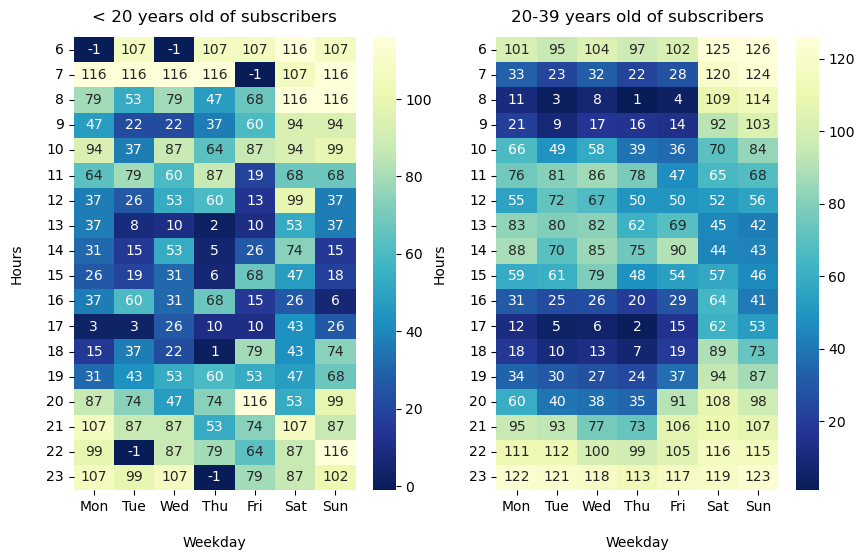

In [23]:
plt.figure(figsize=(10,20))
plt.subplot(321)
sb.heatmap(df_subscriber_hour_lesser_20, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 10})
plt.title("< 20 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours', labelpad=16)
plt.yticks(rotation=360)

plt.subplot(322)
sb.heatmap(df_subscriber_hour_20_39, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 10})
plt.title("20-39 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours', labelpad=16)
plt.yticks(rotation=360)
plt.show()

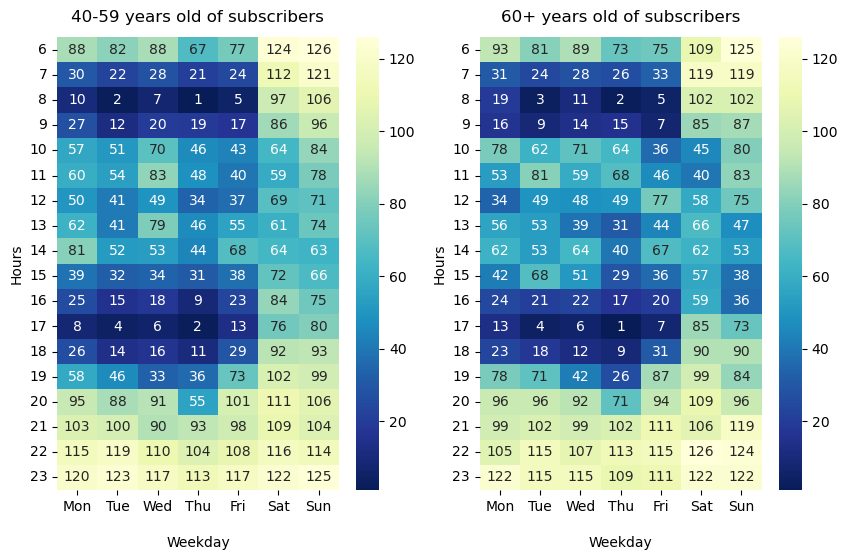

In [24]:
plt.figure(figsize=(10,20))
plt.subplot(321)
sb.heatmap(df_subscriber_hour_40_59, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 10})
plt.title("40-59 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours')
plt.yticks(rotation=360)

plt.subplot(322)
sb.heatmap(df_subscriber_hour_elder_60, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 10})
plt.title("60+ years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours')
plt.yticks(rotation=360)
plt.show()

## Summary
Service usage times during the day are usually during peak hours. they use the service to move for different purposes such as work, study, trade. The proportion of male bikers is also the majority, in addition, about age, people aged 20-39 have the largest proportion. People often use the service on weekdays and rarely use it on weekends. Also Subscribers' average trip duration is ~ 650 seconds and Customers' average trip duration is ~ 1300 seconds.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 960358 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
